# World Happiness 
In this exercise, we will play with data from The World Happiness survey (https://worldhappiness.report/) for the years 2005-2022.

Data description:

- Country: Name of the country.
- Region: The world region the country belongs to.
- Year: The year in which the data was collected
- Happiness Score: The "Cantril Ladder": the answer to the question: "think of a ladder, with the best possible life for you being a 10, and the worst possible life for you being a 0, and rate your current life on this 0 to 10 ladder".
- Economy: Log GDP per capita
- Social support: the answer to the question "if you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not."
- Health: Life expectency at birth
- Freedom: the answer to the question "are you satisfied or dissatisfied with your freedom to choose what you do with your life?"
- Generosity:  the residual of regressing the national average responses to the question "Have you donated money to a charity in the past month?" on GDP per capita
- Perceptions of courrption: the average answer to the questions "Is corruption widespread throughout the government or not?" and "Is corruption widespread within businesses or not?"
- Positive affect: the average frequency of happiness, laughter, and enjoyment on the previous day
- Negative affect: the average frequency of worry, sadness, and anger on the previous day

In [2]:
# importing some of the main packages we'll use in this class
import numpy as np # numpy is the main Python package for scientific computing
import pandas as pd # pandas is a package designed for data manipulation and analysis
import matplotlib.pyplot as plt # matplotlib is a package for plotting data
import seaborn as sns # seaborn is also a package for plotting data, built on top of matplotlib

In [3]:
# just a couple of definitions to make the plots look nicer (IMO)
sns.set(style='ticks',font_scale=1.2)
sns.set_palette("deep")

In [4]:
happiness_df = pd.read_csv('happiness 2005_2022.csv') # read the dataset to a dataframe (more on this later)
happiness_df # default print method in Jupyter prints the top 5 and bottom 5 rows


,Country,Region,Year,Happiness Score,Economy,Social support,Health,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,Southern Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,Southern Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
2,Afghanistan,Southern Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
3,Afghanistan,Southern Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
4,Afghanistan,Southern Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
...,...,...,...,...,...,...,...,...,...,...,...,...
2193,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2194,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2195,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2196,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [5]:
# additional useful methods for overviewing the data
# often, "display" method produces nicer and clearer output than "print"
display(happiness_df.columns.values)  # prints the names of columns in our dataset
print("*****")
display(happiness_df.info()) # gives basic structure information on each variable
print("*****")
happiness_df.describe(include='all') # gives summary statistics (more on this later) for numeric variables and freuqnecy counts for categorical variables


array(['Country', 'Region', 'Year', 'Happiness Score', 'Economy',
       'Social support', 'Health', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype=object)

*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2198 non-null   object 
 1   Region                     2198 non-null   object 
 2   Year                       2198 non-null   int64  
 3   Happiness Score            2198 non-null   float64
 4   Economy                    2178 non-null   float64
 5   Social support             2185 non-null   float64
 6   Health                     2144 non-null   float64
 7   Freedom                    2165 non-null   float64
 8   Generosity                 2125 non-null   float64
 9   Perceptions of corruption  2083 non-null   float64
 10  Positive affect            2175 non-null   float64
 11  Negative affect            2183 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 206.2+ KB


None

*****


,Country,Region,Year,Happiness Score,Economy,Social support,Health,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2198,2198,2198.000000,2198.000000,2178.000000,2185.000000,2144.000000,2165.000000,2125.000000,2083.000000,2175.000000,2183.000000
unique,164,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Lebanon,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,17,484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2014.159691,5.479354,9.389535,0.810632,63.291560,0.747808,0.000089,0.745195,0.652143,0.271501
std,NaN,NaN,4.719098,1.125769,1.153602,0.120960,6.901294,0.140164,0.161120,0.185837,0.105922,0.086875
min,NaN,NaN,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,NaN,NaN,2010.000000,4.646679,8.499639,0.746601,59.114999,0.656393,-0.112228,0.688139,0.571684,0.207660
50%,NaN,NaN,2014.000000,5.432805,9.498372,0.835527,65.045002,0.769738,-0.022674,0.799654,0.663063,0.260671
75%,NaN,NaN,2018.000000,6.309571,10.373493,0.904694,68.481249,0.859390,0.092152,0.868827,0.737936,0.322894


# What can we learn from these outputs?
(don't worry if you don't know the answers (unless you're reading this before the final exam))
- How many observations do we have here?
- Happiness of how many different countries was measured?
- How many different regions of the world are there? Can you name at least one?
- In which years of the world happiness report do these data come from?
- What is the range (minimum and maximun) of the "happiness score"?

## Solution

- 2198
- 2144
- 10, Sub-Saharan Africa
- 2005-2022
- 1.281271-8.018934

## World's happiest countries

Run the code below to see which 3 countries are the happiest in the world (over the years), and their corresponding mean happiness scores.

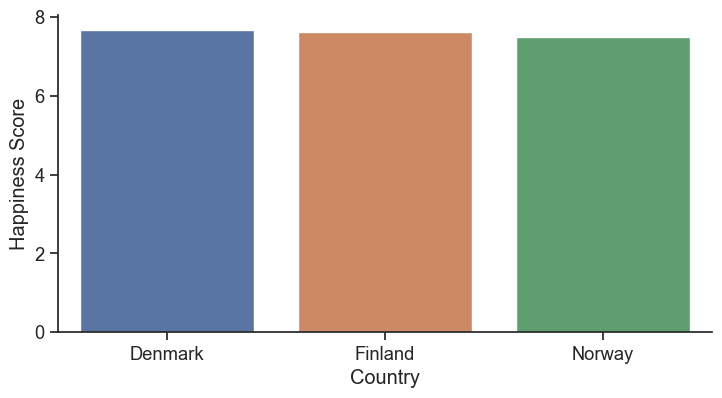

In [6]:
# First compute the average country happiness across all years and sort the countries by mean happiness
grpby_country = happiness_df.groupby('Country')
df_avg_happy = grpby_country.agg({'Happiness Score':'mean'}).reset_index()
df_avg_happy.sort_values('Happiness Score', inplace=True, ascending=False)
df_avg_happy['World happiness rank'] = np.arange(len(df_avg_happy))+1

# Now filter to get only the top 3 happiest countries
happiness_top_3 = df_avg_happy.loc[df_avg_happy['World happiness rank'] <= 3] 
# plot happiness by country
p = sns.catplot(x='Country', y='Happiness Score', data=happiness_top_3, kind="bar")
p.fig.set_size_inches(8,4) # changing plot size for readability

##### challenge
1. Try to modify the code below (a copy of the code above) the view the top 7 happiest countries 
2. Try to modify the code below (a copy of the code above) to see which 7 countries are the least happy (clue: there are 164 countries in this dataset)

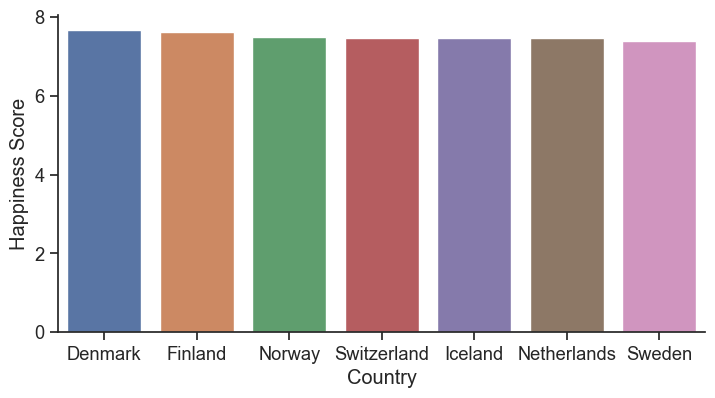

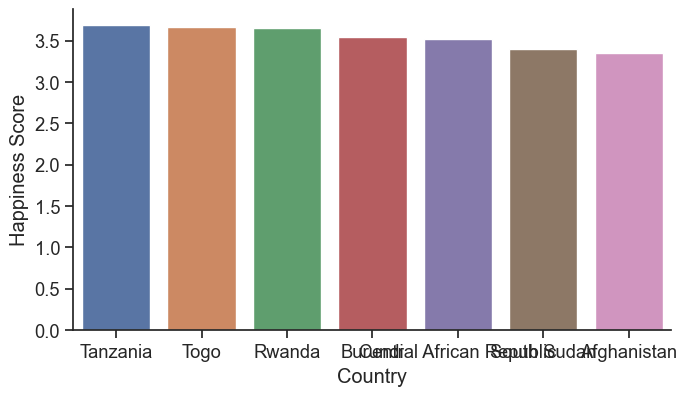

In [7]:
# 1
happiness_top_7 = df_avg_happy.loc[df_avg_happy['World happiness rank'] <= 7] 
# plot happiness by country
p = sns.catplot(x='Country', y='Happiness Score', data=happiness_top_7, kind="bar")
p.fig.set_size_inches(8,4) # changing plot size for readability

# 2 
happiness_least_7 = df_avg_happy.loc[df_avg_happy['World happiness rank'] >= 158] 
# plot happiness by country
p = sns.catplot(x='Country', y='Happiness Score', data=happiness_least_7, kind="bar")
p.fig.set_size_inches(8,4) # changing plot size for readability

- Is there anything in common to the happiest countries? 
- Is there anything in common to the least happy countries?
***
## Solution
- All the countries are from the same region(Western Europe).
- Six of the countries are from the same region(Sub-Saharan Africa).
***
## What about Israel?
Run the code below to compare the happiness in Israel to that in some other countries

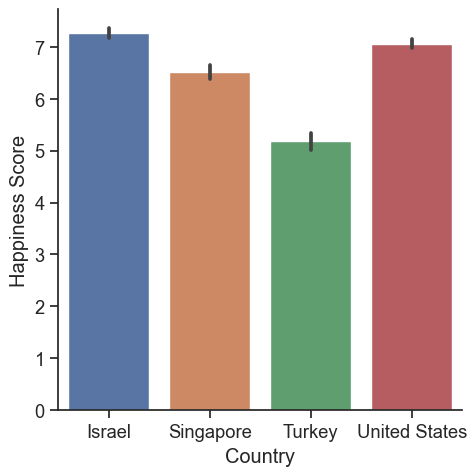

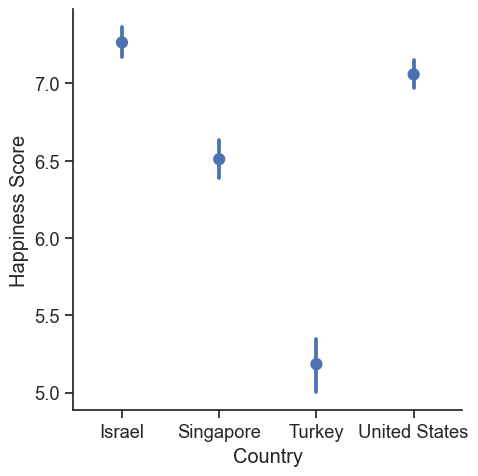

In [8]:
# list of countries we want to check out
countries = ['Israel', 'United States', 'Turkey', 'Singapore']  
# filters data to include countries from our list
happiness_countries = happiness_df.loc[happiness_df['Country'].isin(countries)]  
# plot happiness by country (we'll present the same information in 2 ways)
sns.catplot(kind="bar", x='Country', y='Happiness Score', data=happiness_countries)
sns.catplot(kind="point", x='Country', y='Happiness Score', data=happiness_countries, join=False);

(note the little lines on the bars and around the points - these are called confidence intervals, and we will disucss them later in the course)

Are you surprised by these results? 

#### Solution
I am indeed surprised that the happiness score of Israel is higher the USA, cause US, in contrast to Israel, is a country with more liberal aspects.

#### challenge
Change the code below (a copy of the code above) to compare between 5 countries you think would make an interesting comparison:
- Why did you choose these countries? 
- What did you expect to see?
- Are you surprised by the results?

#### Solution
- I chose to compare Israel, Lebanon, syria, Jordan and Egypt, cause 4 of those countries have a boarder with Israel, so I am intrested to know if there is a noticibele difference betwean Israel and the 4 other countries.
- I expected that Israel would be the country with the higher happiness score cause Israel is the most modern and liberal country between those countries, and Indeed it is true.
- Not at all.

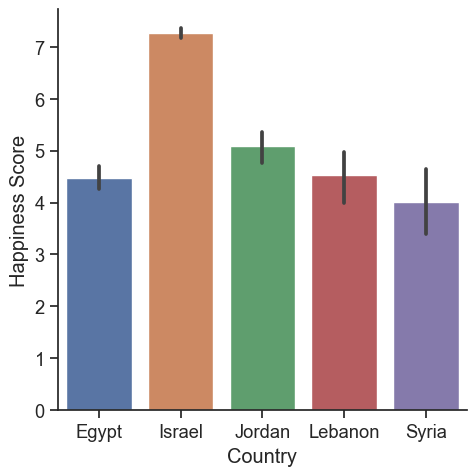

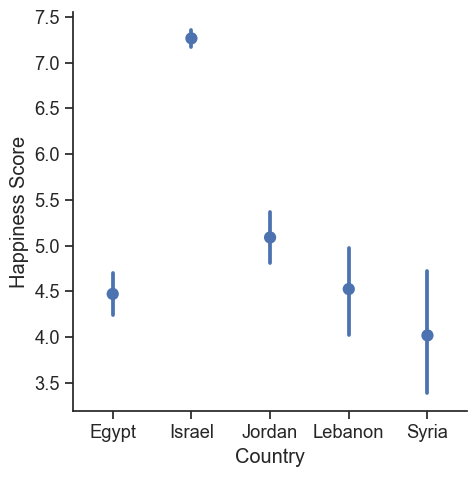

In [9]:
# list of countries we want to check out
countries = ['Israel', 'Lebanon', 'Syria', 'Jordan', 'Egypt']  
# filters data to include countries from our list
happiness_countries = happiness_df.loc[happiness_df['Country'].isin(countries)]  
# plot happiness by country (we'll present the same information in 2 ways)
sns.catplot(kind="bar", x='Country', y='Happiness Score', data=happiness_countries)
sns.catplot(kind="point", x='Country', y='Happiness Score', data=happiness_countries, join=False);


## Let's compare the whole world!

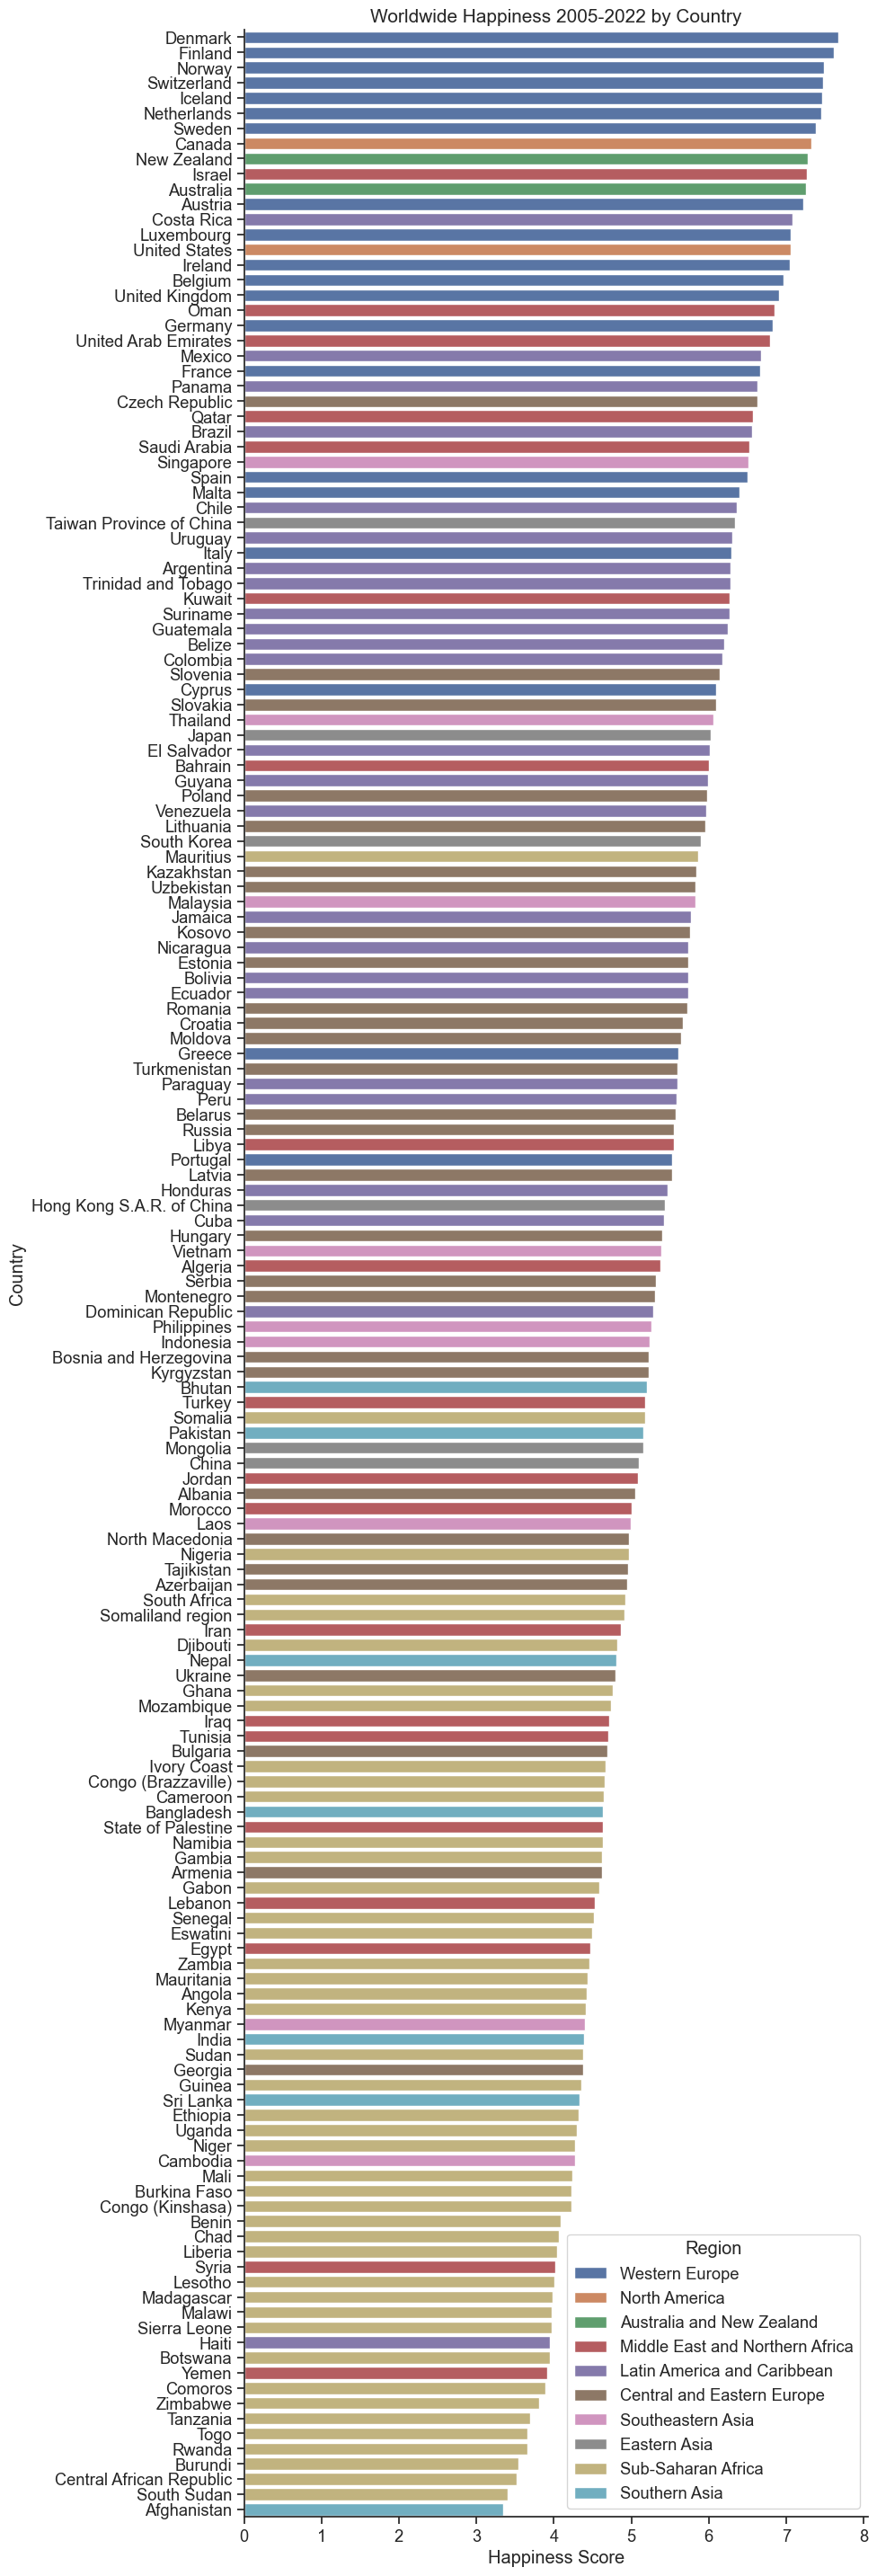

In [10]:
# let's compare worldwide mean happiness in 2005-2022

# First compute the mean happiness over the years 2005-2022 and sort the countries by mean happiness, while keeping "Region"
grpby_country = happiness_df.groupby(['Country','Region'])
df_avg_happy = grpby_country.agg({'Happiness Score':'mean'}).reset_index()
df_avg_happy.sort_values('Happiness Score', inplace=True, ascending=False)

# save the color palette used here, for later
col_dict = dict(zip(df_avg_happy['Region'].unique(),sns.color_palette().as_hex()))

# next, plot the desired figure
p=sns.catplot(kind='bar', x='Happiness Score', y='Country', hue='Region', data=df_avg_happy, dodge=False, legend_out=False, palette=col_dict)
p.fig.set_size_inches(18,35)
p.ax.set_title('Worldwide Happiness 2005-2022 by Country', size=15);

Which **world regions** seem to you the happiest? Which are least happy?
#### Solution
- the hapiest rigions that seem to me the happiest are Western Europe and Australia ana New Zealand.
- the least hapiest are Sub-Saharan Africa and Southern Asia.
***
Let's check if your answers hold when we look at region averages:

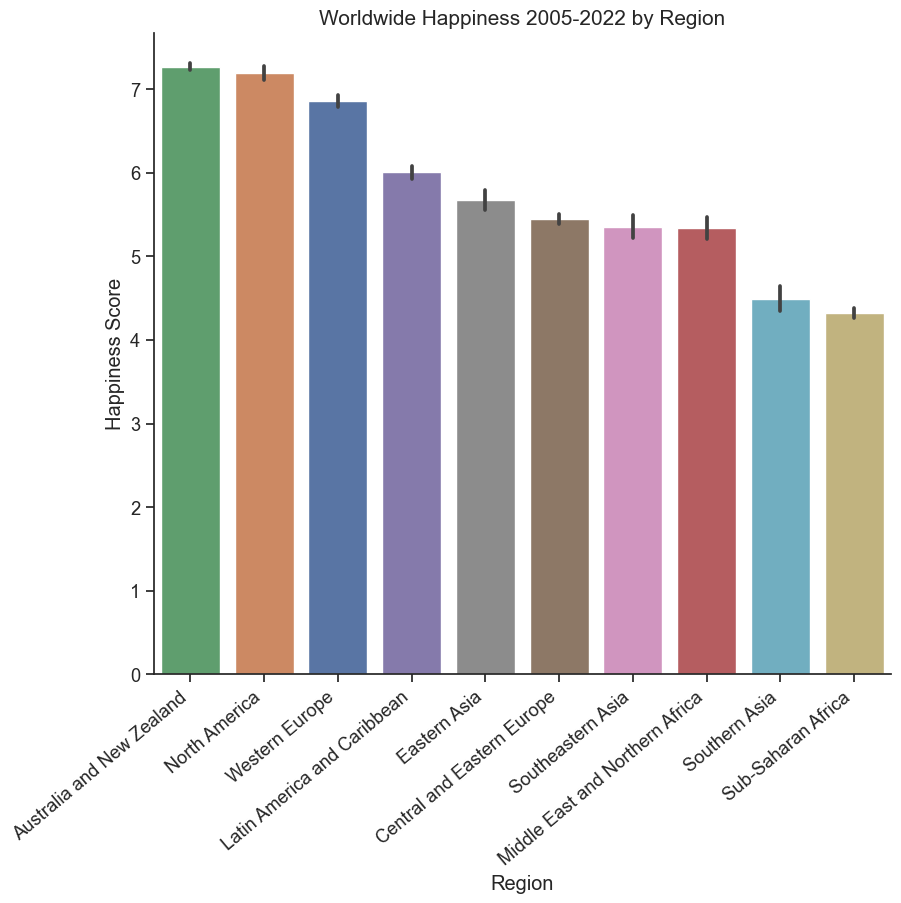

In [24]:
# compute region averages
grpby_region = happiness_df.groupby(['Region'])
avg_happy_region = grpby_region.agg({'Happiness Score':'mean'}).reset_index()
avg_happy_region.sort_values('Happiness Score', inplace=True, ascending=False)

# plot the region averages
p = sns.catplot(kind='bar', y='Happiness Score', x='Region', order=avg_happy_region['Region'], 
                data=happiness_df, dodge=False, palette=col_dict)
p.fig.set_size_inches(12,8)
p.ax.set_title('Worldwide Happiness 2005-2022 by Region', size=15)
p.set_xticklabels(rotation=40, ha="right");

Did your answers from above hold?
#### Solution
- I did not mantion the region North America between the happiest regions.
***
Which region is Israel in? 
Is it a "happy" region? 
Is Israel a "happy" country?
Why the difference?
#### Solution
- Middle East and Northern Africa.
- It is located at the bottom of the diagram, so it is safe to say that the region that Israel belong to is not an "happy" region.
- Israel located at the top 10 of 164 countries, so it is safe to say that Idrael is a "happy" country.
- The difference could be because Israel is one of the modern and liberal countries in the region, so probably the citizens of the country feel more freedom than the most countries in the region.
***
Let's also look at the variance (more on this later) within regions

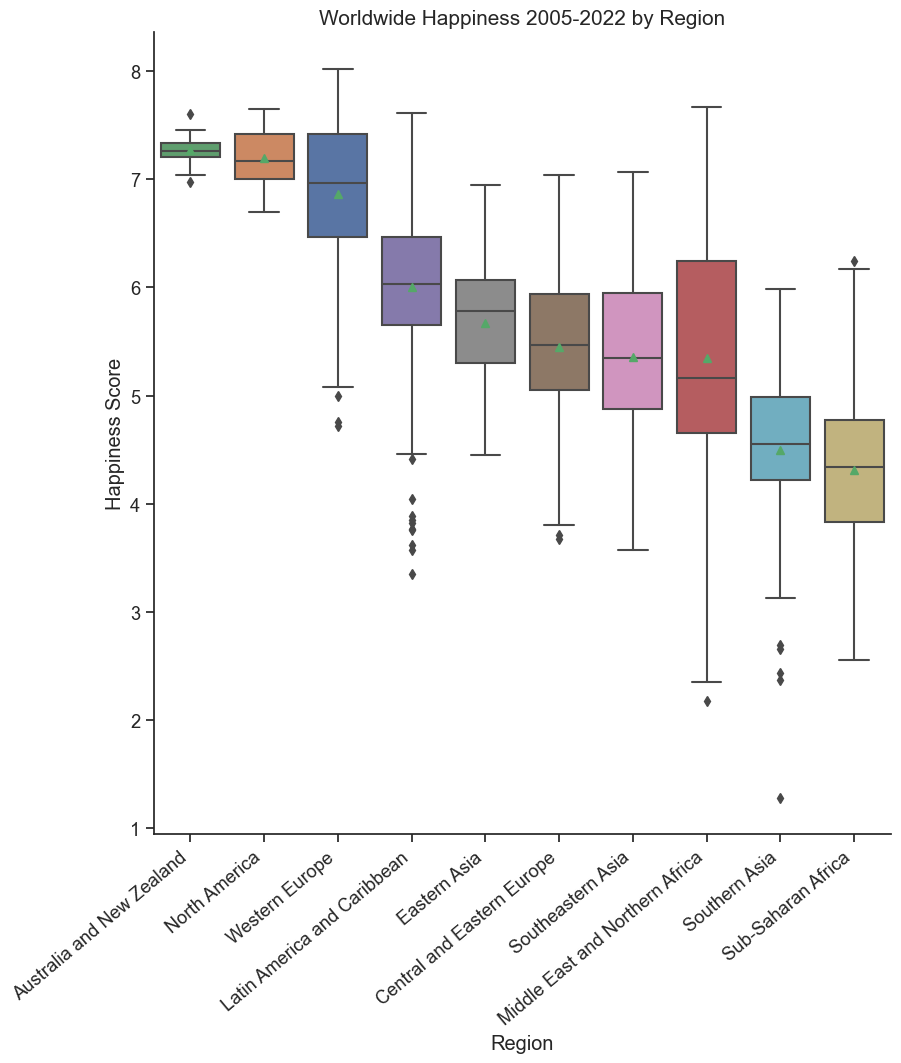

In [12]:
# plot the same information but also add some information on how different countries within a region are different (variance)
p = sns.catplot(kind='box', y='Happiness Score', x='Region', order=avg_happy_region['Region'], 
                data=happiness_df, dodge=False, palette=col_dict, showmeans=True)
p.fig.set_size_inches(12,10)
p.ax.set_title('Worldwide Happiness 2005-2022 by Region', size=15)
p.set_xticklabels(rotation=40, ha="right");

Which world region seem to you as the most diverse in terms of happiness?
#### Solution
- Middle East and Northern Africa.
*** 
Let's look at the distribution of happiness in the Middle East and Northern Africa and compare it to the the distribution in Eastern Asia

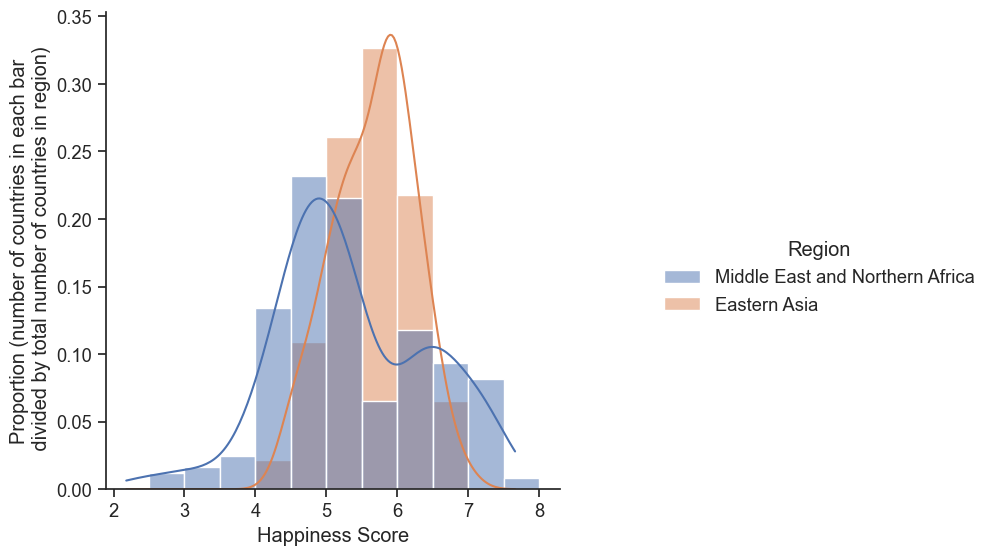

In [13]:
# First get only data for the regions of interst
region_to_check = ['Middle East and Northern Africa', 'Eastern Asia'] 
happiness_region = happiness_df.loc[happiness_df['Region'].isin(region_to_check)]

# next, plot the distribution of happiness in this region
p = sns.displot(happiness_region, x='Happiness Score', hue='Region', bins=np.arange(2.5, 8.5, 0.5), common_norm=False, stat='proportion', kde=True)
p.fig.set_size_inches(10,6)
p.ax.set(ylabel='Proportion (number of countries in each bar\n divided by total number of countries in region)');


What can we learn from this?

#### challenge
Change the code below (a copy of the code above) to plot the distribution of another region. 
What did you learn?
### Solution
- I learned that the distribution of the region Middle East and Northern Africa is not as it sould be.

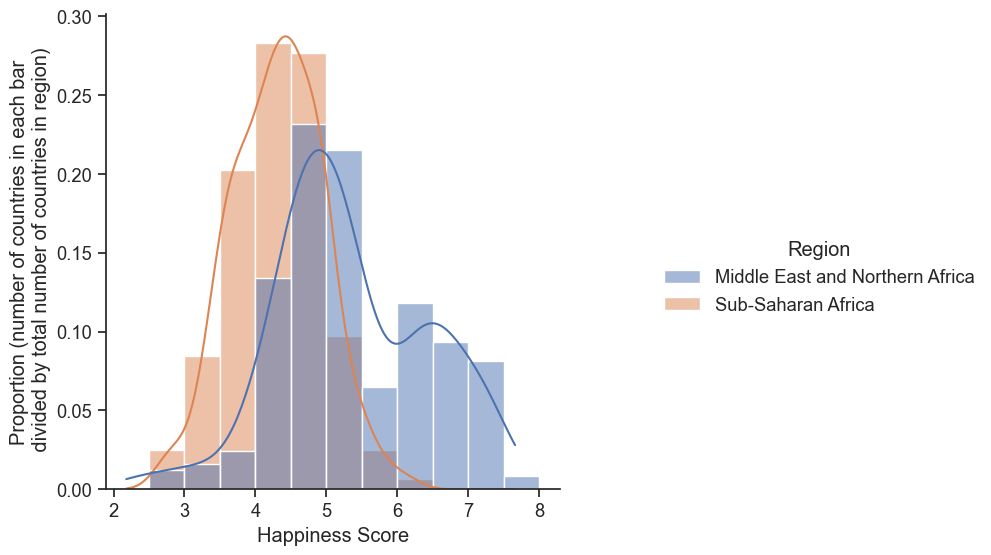

In [14]:
# First get only data for the regions of interst
region_to_check = ['Middle East and Northern Africa', 'Sub-Saharan Africa'] 
happiness_region = happiness_df.loc[happiness_df['Region'].isin(region_to_check)]

# next, plot the distribution of happiness in this region
p = sns.displot(happiness_region, x='Happiness Score', hue='Region', bins=np.arange(2.5, 8.5, 0.5), common_norm=False, stat='proportion', kde=True)
p.fig.set_size_inches(10,6)
p.ax.set(ylabel='Proportion (number of countries in each bar\n divided by total number of countries in region)');


## Time trends in world happiness

So far we looked at average country happiness over all years of the dataset. We can also look at how happiness changes as a function of time.

The code below plots the mean world happiness for years 2005-2022

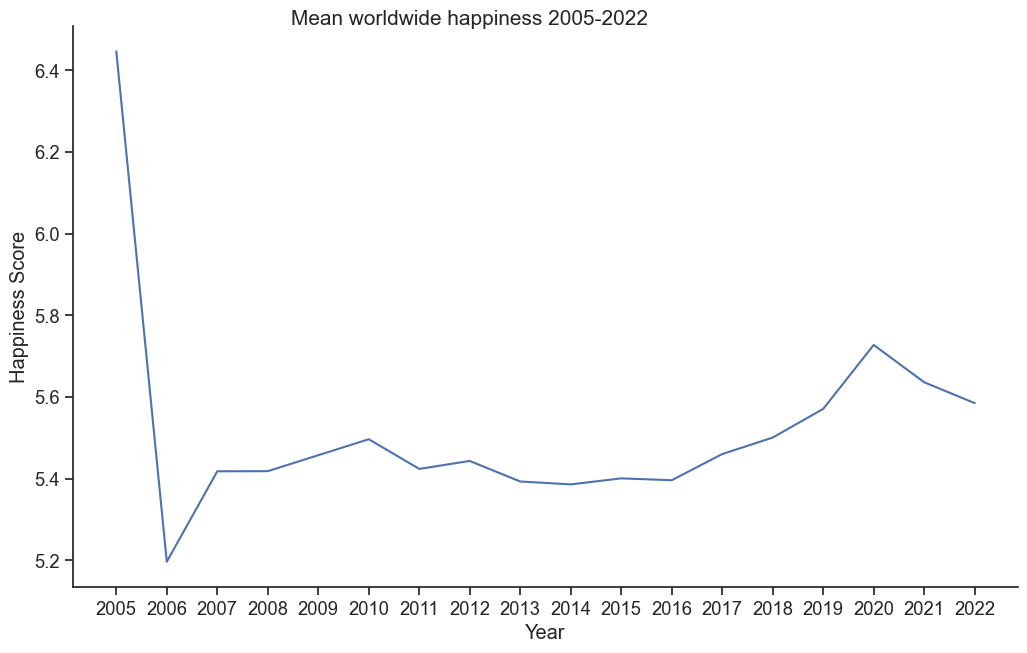

In [15]:
p = sns.relplot(kind='line', y='Happiness Score', x='Year', data=happiness_df, errorbar=None)
p.fig.set_size_inches(12,7)
p.set(xticks=range(2005, 2023), xticklabels=range(2005, 2023))
p.fig.suptitle('Mean worldwide happiness 2005-2022', size=15);

#### What happened in 2006?
Any suggestions?

#### Solution
- The number of the countries that participated was extrimly higher than the year before, so the result of the survey was more reliable.

Run the following code:

In [16]:
country_grpby_year = happiness_df[['Country','Year']].groupby('Year')
display(country_grpby_year.count())

,Country
Year,
2005,27
2006,89
2007,102
2008,110
2009,114
2010,124
2011,146
2012,141
2013,136


So, what do you think happened in 2006?

#### Solution
- The number of the countries that participated was extrimly higher than the year before, so the result of the survey was more reliable.

Here's some more evidence:

In [17]:
region_to_check = ['North America', 'Western Europe', 'Sub-Saharan Africa', 'Southern Asia'] 
some_regions = happiness_df.loc[happiness_df['Region'].isin(region_to_check)]
country_grpby_year_region = some_regions[['Country','Year','Region']].groupby(['Year','Region'])
pd.set_option('display.max_rows', 100) # to display all rows
display(country_grpby_year_region.count())

Country
Year Region                     
2005 North America             1
     Southern Asia             1
     Western Europe           10
2006 North America             1
     Southern Asia             4
     Sub-Saharan Africa       22
     Western Europe            8
2007 North America             2
     Southern Asia             5
     Sub-Saharan Africa       20
     Western Europe            9
2008 North America             2
     Southern Asia             6
     Sub-Saharan Africa       26
     Western Europe           15
2009 North America             2
     Southern Asia             6
     Sub-Saharan Africa       23
     Western Europe           13
2010 North America             2
     Southern Asia             6
     Sub-Saharan Africa       22
     Western Europe           17
2011 North America             2
     Southern Asia             6
     Sub-Saharan Africa       36
     Western Europe           17
2012 North America             2
     Southern Asia             6
     Sub-Saharan Africa       29
     Western Europe           20
2013 North America             2
     Southern Asia             7
     Sub-Saharan Africa       28
     Western Europe           18
2014 North America             2
     Southern Asia             7
     Sub-Saharan Africa       35
     Western Europe           19
2015 North America             2
     Southern Asia             7
     Sub-Saharan Africa       32
     Western Europe           20
2016 North America             2
     Southern Asia             5
     Sub-Saharan Africa       34
     Western Europe           20
2017 North America             2
     Southern Asia             6
     Sub-Saharan Africa       36
     Western Europe           20
2018 North America             2
     Southern Asia             6
     Sub-Saharan Africa       35
     Western Europe           19
2019 North America             2
     Southern Asia             6
     Sub-Saharan Africa       35
     Western Europe           20
2020 North America             2
     Southern Asia             5
     Sub-Saharan Africa       20
     Western Europe           19
2021 North America             2
     Southern Asia             6
     Sub-Saharan Africa       23
     Western Europe           19
2022 North America             2
     Southern Asia             4
     Sub-Saharan Africa       28
     Western Europe           20

### Warning! Data is usually not as clean as you'd like it to be!

<img src="0_YCghEemt6BtW9OZV.png" width="400" align="left"/>

Let's remove observations prior to 2007 before we continue:

In [18]:
new_happiness_df = happiness_df.loc[happiness_df['Year'] > 2006].copy() 
# when creating a new df based on an existing one, it is good practice to explicitly tell pandas to make a copy

Now, let's check the trends again.

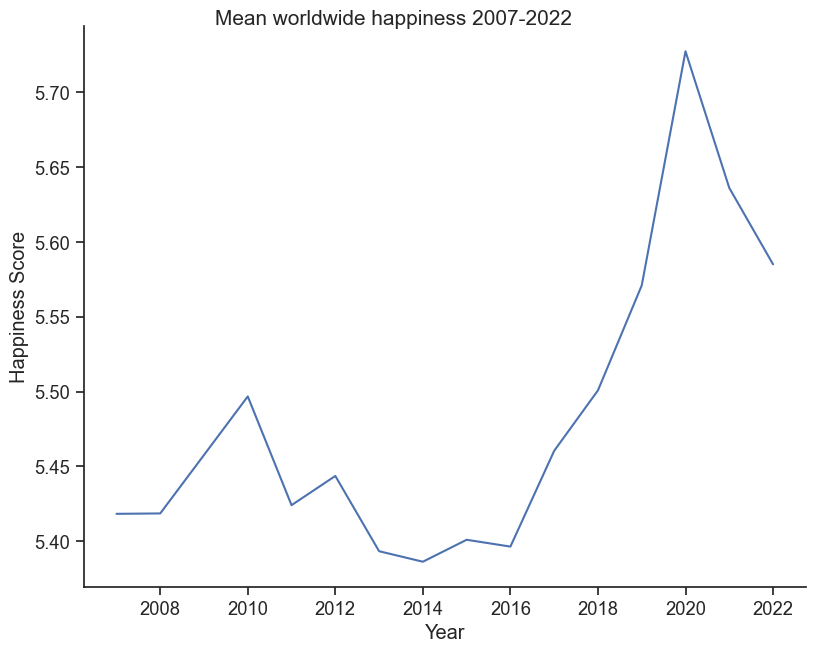

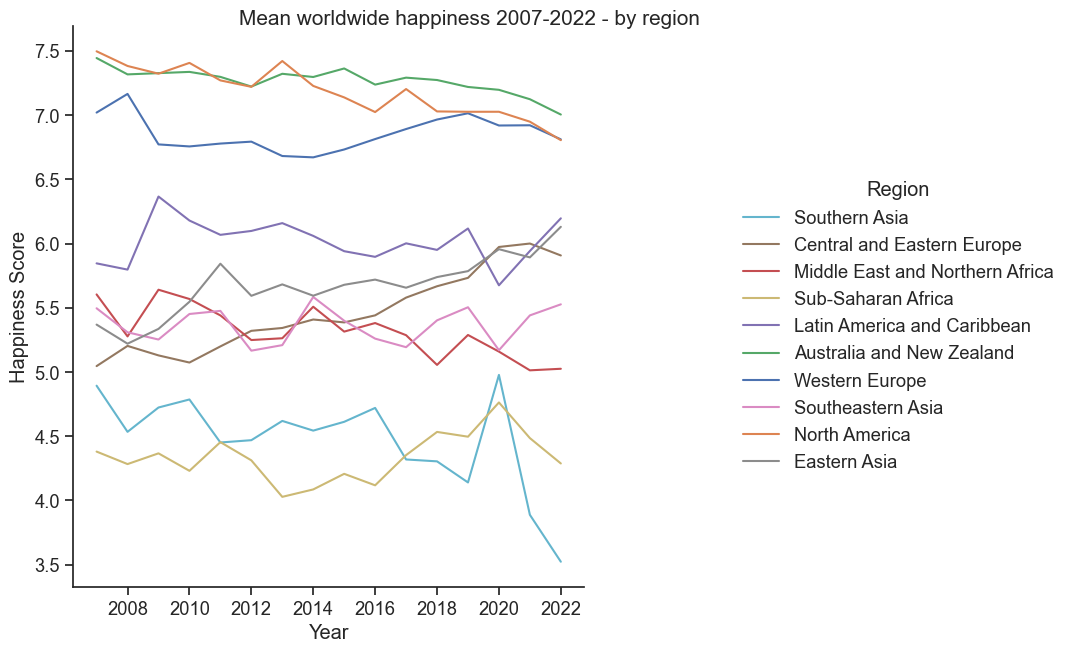

In [19]:
# Worldwide:
p = sns.relplot(kind='line', y='Happiness Score', x='Year', data=new_happiness_df, errorbar=None)
p.fig.set_size_inches(10,7)
p.fig.suptitle('Mean worldwide happiness 2007-2022', size=15)

# By region
p = sns.relplot(kind='line', y='Happiness Score', x='Year', data=new_happiness_df, errorbar=None, hue='Region', palette=col_dict)
p.fig.set_size_inches(12,7)
p.fig.suptitle('Mean worldwide happiness 2007-2022 - by region', size=15);

Hmm, 2020 was a good year, ha?
Was it?

What can we say on the trends of world happiness between 2007 and 2022?<br>
How meaningful are the changes? Can you tell?

What can we say on the differences in trends across different regions?

Are these plots reliable given the change in countries surveyed across time?

#### Solution של אורי
כפי שתגלו במהלך הקורס, לחלק מהשאלות שעולות מנתונים שנסתכל עליהם (ושתסתכלו עליהם במקומות אחרים) אין תשובה חד משמעית, יחידה ונכונה כמו שמקובל בעולמות תוכן אחרים. פעמים רבות, הדאטה נתון לפרשנות של המנתח. אחד מהתפקידים של מנתח הנתונים היא לפרש אותם ואז לבדוק את הפירוש בכל מיני דרכים אחרות (ולתקשר את הפירוש הזה בצורה המיטיבית). 
התשובות שאני הייתי נותן לשאלות האלה הן כדלהלן (כאמור, אלו לא בהכרח התשובות היחידות הסבירות):
1. לפי הגרף נראה שכן, אך כמובן שאנו יודעים ש-2020 לא היתה שנה מאוד מאושרת בעולם. סביר שהנתונים ודרך הצגתם בגרף מטעים אותנו. רצוי לבדוק מה המקור לכך.
2. ההבדלים בממוצע האושר בעולם בין 2007 ל-2018 נראים קטנים מאוד (לפי הערכים בציר האנכי). שנים 2019-2022 מתאפיינות באושר ממוצע גבוה יותר (אך ראה תשובה 1). 
3. מבחינת איזורי העולם השונים, נראה שיש מגמת ירידה באושר בחלק מהאזורים המאושרים ביותר ובמקביל מגמת עלייה בחלק מהאזורים המאושרים פחות. מלבד מה שנראה כאנומליה בשנים האחרונות בדרום אסיה ואולי מגמה בפוכה במזרח התיכון וצפון אפריקה, יתכן שישנה מגמה של התכנסות של כלל האזורים בעולם לאותו כיוון לאורך השנים, אך ברור שההבדלים נשארים גדולים וניכרים גם ב-2022.
4. כפי שדיברנו בכיתה, סביר שחלק מהנקודות פה מייצגות ממוצעים של דברים מאוד שונים, כתלות במדינות שהשתתפו בסקר. לכן, קשה מאוד להסיק מסקנות מהימנות מהגרפים האלה.


***
***

Let's look on the trends in specific countries. For example, let's compare the 5 most populated countries in the world:

Text(0.5, 0.98, 'Happiness 2007-2022 for most populated countries')

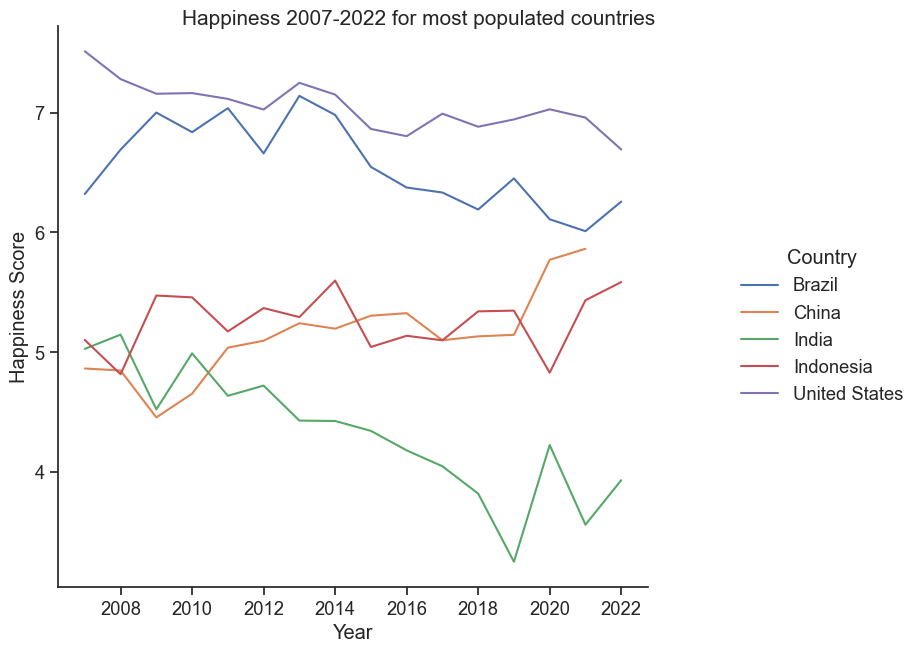

In [20]:
largest_countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
largest_happiness = new_happiness_df.loc[happiness_df['Country'].isin(largest_countries)]
p = sns.relplot(kind="line", x="Year", y='Happiness Score', data=largest_happiness, hue='Country')
p.fig.set_size_inches(10,7)
p.fig.suptitle('Happiness 2007-2022 for most populated countries', size=15)

#### Challenge

Think of countries whose happiness trends you'd like to compare (why these countries?) and plot their happiness trends for 2007-2022. Use the code above as reference.<br>

What did you learn?

#### Solution
- Couse I wanted to find if there is a yaer that those countries had the same trend, despite the mean between 2005-2007.
- I learned that 2021 was a year that happiness score of the countries with the highest mean score declined.

Text(0.5, 0.98, 'Happiness 2007-2022 for the countries with the higher mean happiness score between 2005-2022')

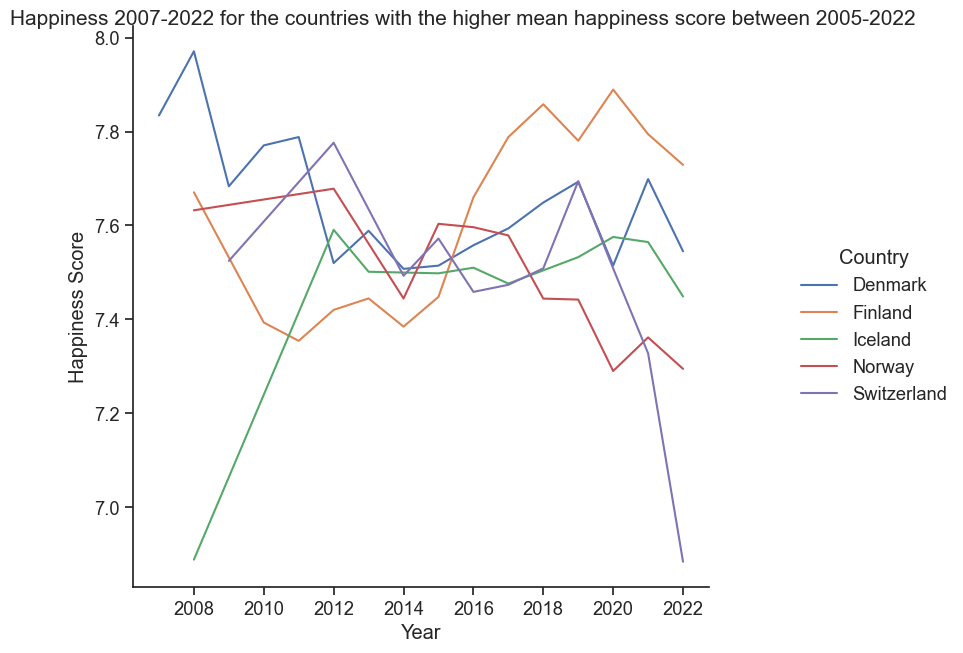

In [21]:
happy_countries = ['Denmark', 'Finland', 'Norway', 'Switzerland', 'Iceland']
happy_happiness = new_happiness_df.loc[happiness_df['Country'].isin(happy_countries)]
p = sns.relplot(kind="line", x="Year", y='Happiness Score', data=happy_happiness, hue='Country')
p.fig.set_size_inches(10,7)
p.fig.suptitle('Happiness 2007-2022 for the countries with the higher mean happiness score between 2005-2022', size=15)

What can we say happened to happiness of people in the most populated countries in recent years? <br>
Do you find this strange? reaonable? why?

#### Solution
- ?

***

Let's compare the average of the most populated and the average of all other countries.

,Country,Region,Year,Happiness Score,Economy,Social support,Health,Freedom,Generosity,Perceptions of corruption,Positive affect,Negative affect,largest
count,2082,2082,2082.000000,2082.000000,2063.000000,2069.000000,2029.000000,2054.000000,2043.000000,1975.000000,2061.000000,2069.000000,2082
unique,163,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Zimbabwe,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,16,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003
mean,NaN,NaN,2014.627281,5.478889,9.393749,0.808416,63.383068,0.747537,-0.000118,0.745123,0.651525,0.272418,NaN
std,NaN,NaN,4.399596,1.123052,1.150646,0.121244,6.745349,0.140239,0.160843,0.185687,0.106174,0.087686,NaN
min,NaN,NaN,2007.000000,1.281271,5.526723,0.228217,17.360001,0.257534,-0.337527,0.035198,0.178886,0.082737,NaN
25%,NaN,NaN,2011.000000,4.646679,8.503747,0.743754,59.125000,0.656299,-0.112582,0.688600,0.570210,0.207653,NaN
50%,NaN,NaN,2015.000000,5.435265,9.503192,0.832254,65.099998,0.769955,-0.023311,0.799748,0.662837,0.261621,NaN
75%,NaN,NaN,2018.000000,6.308906,10.373216,0.903559,68.500000,0.859306,0.091989,0.868358,0.736574,0.325555,NaN


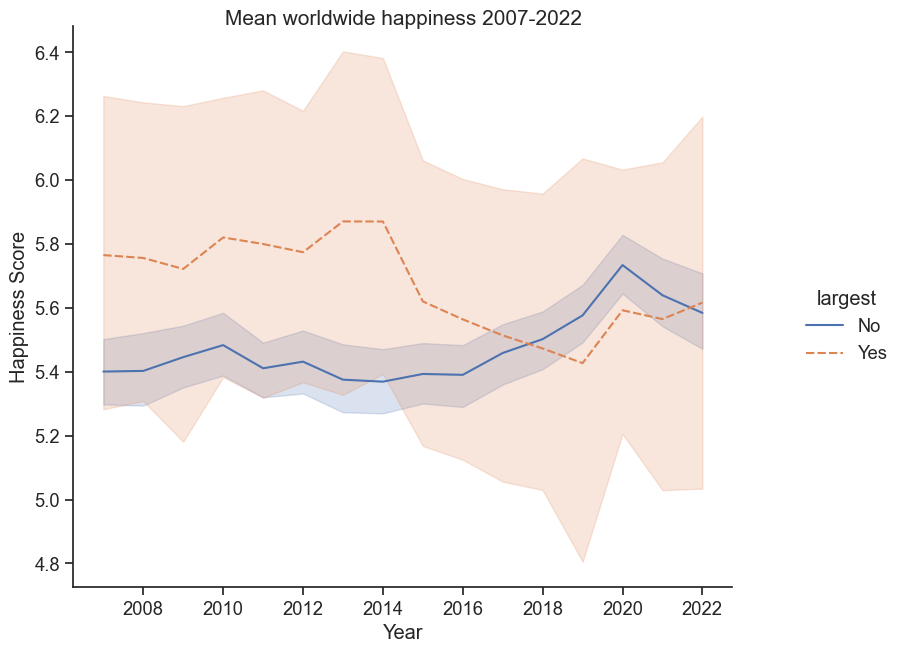

In [22]:
# We can first add a column to the dataframe that marks whether the country is one of the largest countries or not 
# This is an example of feature engineering, more on this later
new_happiness_df['largest'] = "No"
new_happiness_df.loc[new_happiness_df['Country'].isin(largest_countries),'largest'] = "Yes"
display(new_happiness_df.describe(include='all')) # checking the result makes sense

# Now let's plot the difference in average trends between the largest and the other countries:
p = sns.relplot(kind='line', y='Happiness Score', x='Year', data=new_happiness_df, errorbar=('ci', 68), hue='largest', style='largest')
p.fig.set_size_inches(10,7)
p.fig.suptitle('Mean worldwide happiness 2007-2022', size=15);

What can we say about the trends in happiness in the world most populated countries and the rest of the world?

#### Solution
- The mean happiness score of the most populated countries dcilined, in contradt to the rest of the world.

***

## What is related to happiness?

So far we only used 4 coulmns of our original data (Country, Region, Year, & Happiness Score). Let's check out the additional information we have, possible factors that may be related to happiness.

The code below shows the relationship between the Economy (GDP per capita) on the x-axis, and happiness scores on the y-axis. <br>What do you infer from this plot?

#### Solution
- That there is a noticeable correlation between economy and the happiness score of the country.

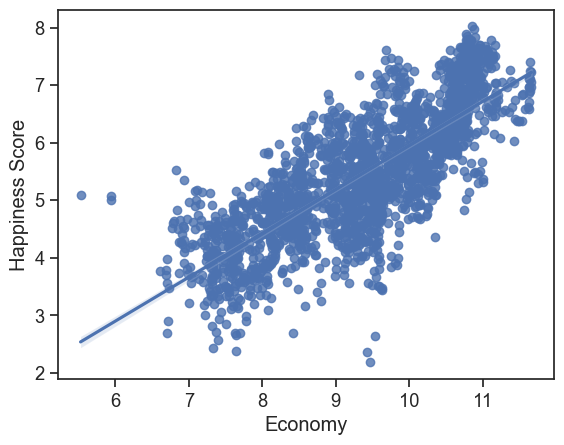

In [23]:
# make scatter plot of Economy and happiness
ax = sns.regplot(x='Economy', y='Happiness Score', fit_reg=True, data=happiness_df)

#### Challenge
Do you expect other factors in the data would also be related to happiness? In what way?

#### Solution
1. Freedom
2. Social support
3. Health
- The higher the score of each one of those factores - the higher of the happiness score.

### ...
1. Make a list of your intuitive predictions for the relationship of each of the other factors in the data and happiness
2. Write code to test your intuitive predicitons

What are your conclusions? <br>
Can you tell us what makes people happy?

***
***


### Warning: Correlation does not imply causation!

<img src="dilbert.gif" width="640" height="400" align="left"/>

### Some other things to consider

- We analyzed the average happiness in the world/regions with each country as one data-point. Does this make sense? Can you think of another way to do things?
- Look at the definitions for "Positive affect" and "Negative affect". Do you think the six factors explaining the Happiness Score should be related to these? More or less so than their relationship with happiness? How about repeating the exercise for one of these as our main target variable?
- We can think of more complex data manipulations that can help us explore other interesting questions:
    - Which countries' happiness increased the most between 2007 and 2022? Decreased the most? 
    - Can we spot major geo-political events using this data?
    - Can we predict a "new country"'s happiness score based on the six factors in our data? How well?
    - What countries are more or less happy than we would expect them to be given their levels of six factors? 
    - ...